In [4]:
import math
import random
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [62]:
df = pd.read_csv("ok.csv")
df['受教育程度'].unique()

/var/folders/bw/286_tkcx5b73w3x89md7rc4c0000gp/T/ipykernel_4163/4084609855.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ok.csv")


array(['高中', '本科（全日制）', '小学', '未受过正式教育', '本科（非全日制）', '初中', '大专（非全日制）',
       '中专', '大专（全日制）', '职高、技校', '研究生及以上', '私塾', '高中（二年级）', '高中（三年级）',
       '初中（三年级）', '小学（四年级）', '小学（三年级）', '大专（全日制)', '初中（二年级）', '没有受过正式教育',
       '小学（六年级）', '研究生及以上（国内就读）', '初中（一年级）', '小学（五年级）', '小学（二年级）',
       '高中（一年级）', '小学（一年级）', '自修', '*研究生及以上（国外就读）', '其他', nan, '普通高中',
       '职业高中', '大学专科（成人高等教育）', '大学本科（正规高等教育）', '大学专科（正规高等教育）', '没有受过任何教育',
       '大学本科（成人高等教育）', '扫盲班', '技校', '大学本科(正规高等教育)', '研究生以上',
       '大学专科(正规高等教育)', '大学专科(成人高等教育)', '大学本科(成人高等教育)', '私塾、扫盲班'],
      dtype=object)

In [109]:
# 导入数据
df = pd.read_csv("ok.csv")
df = df[df['性别']=='女']  # 只保留女性样本
# 受教育程度
df['edu'] = df['受教育程度'].map(
  {
        '研究生及以上（国外就读）': 3,
        '研究生及以上（国内就读）': 3,
        '研究生以上': 3,
        '本科（非全日制）': 2,
        '本科（全日制）': 3,
        '大学本科(成人高等教育)': 2,
        '大学本科(正规高等教育)': 3,
        '大学本科（成人高等教育）': 2,
        '大学本科（正规高等教育）': 3,
        '高中': 2,
        '高中（二年级）': 2,
        '高中（三年级）': 2,
        '高中（一年级）': 2,
        '技校': 2,
        '职高、技校': 2,
        '职业高中': 2,
        '中专': 2,
        '大学专科(成人高等教育)': 2,
        '大学专科(正规高等教育)': 2,
        '大学专科（成人高等教育）': 2,
        '大学专科（正规高等教育）': 2,
        '大专（非全日制）': 2,
        '大专（全日制）': 2,
        '初中': 1,
        '初中（二年级）': 1,
        '初中（三年级）': 1,
        '初中（一年级）': 1,
        '没有受过任何教育': 1,
        '没有受过正式教育': 1,
        '普通高中': 1,
        '其他': 1,
        '扫盲班': 1,
        '私塾': 1,
        '私塾、扫盲班': 1,
        '未受过正式教育': 1,
        '小学': 1,
        '小学（二年级）': 1,
        '小学（六年级）': 1,
        '小学（三年级）': 1,
        '小学（四年级）': 1,
        '小学（五年级）': 1,
        '小学（一年级）': 1,
})
df['dq'] = df['地区'].map({
    # '一线城市'
        '北京': 1,
        '上海': 1,
        '深圳': 1,
    # '直辖市'
        '天津': 2,
        '重庆': 2,
        '广东': 2,
    # '东部沿海地区'
        '福建': 2,
        '河北': 3,
        '江苏': 2,
        '浙江': 2,
        '山东': 2,
    # '中西部地区'
        '安徽': 3,
        '甘肃': 3,
        '广西': 3,
        '贵州': 3,
        '海南': 3,
        '河南': 3,
        '黑龙江': 3,
        '湖北': 3,
        '湖南': 3,
        '吉林': 3,
        '江西': 3,
        '辽宁': 3,
        '内蒙古': 3,
        '宁夏': 3,
        '青海': 3,
        '山西': 3,
        '陕西': 3,
        '四川': 3,
        '西藏': 3,
        '新疆': 3,
        '云南': 3
})
df['hk'] = df['户口性质'].map
({
        '城镇常住户口': 1,
        '地级市城区户口': 1,
        '非农户口（城镇户口）': 1,
        '非农业户口': 1,
        '居民户口（例如：户籍制度改革后的广东）': 1,
        '居民户口（以前是非农业户口）': 1,
        '省会城市城区户口': 1,
        '县级市城区户口': 1,
        '直辖市城区户口': 1,
    # '农村户口'
        '农业户口': 2,
        '农村户口': 2,
        '非农户口（蓝印户口）': 2,
        '居民户口（以前是农业户口）': 2,
        '海外': 3,
        '集镇或自理口粮户口': 3,
        '军籍': 3,
        '没有户口': 3,
        '其他': 3
})
df['hy'] = df['行业'].map
({
    # '第一类：党政机关'
        '党政机关': 1,
        '军队': 1,
        '事业单位': 1,
        '社会团体': 1,
        '社会团体、居/村委会': 1,
    # '第二类：企业'
        '企业': 2,
    # '第三类：无单位/自雇'
        '无单位/自雇（包括个体户）': 3,
        '无单位/自雇/自办（合伙）企业': 3,
        '其他': 3
})
df['alone'] = df['婚姻状况'].map
({
    # '与伴侣住在一起'
        '初婚有配偶': 1,
        '已婚': 1,
        '已婚有配偶': 1,
        '再婚有配偶': 1,
        '同居': 1,
        '丧偶后再婚': 1,
        '离婚后再婚': 1,
    # '没有与伴侣住在一起'
        '从未结过婚': 2,
        '分居': 2,
        '分居未离婚': 2,
        '离婚': 2,
        '离婚未再婚': 2,
        '丧偶': 2,
        '丧偶未再婚': 2,
        '未婚': 2
})
df['freetime'] = df['工作自主性'].map
({
    '完全不能自主': 1,
    '在很少程度上自主': 2,
    '能在一定程度上自主': 3,
    '完全自主决定': 4
})

# df['生育态度（如果没有政策限制，希望有几个孩子）'] = df['syyy'],
# df['传统观念（您是否同意男主外女主内）'] = df['ctgn'],
# df['性别刻板印象（您是否同意男性能力天生比女性强）'] = df['xbqs'],
# df['婚姻依赖型（您是否同意干得好不如嫁的好）'] = df['dlzz'],
# df['性别偏见（您是否同意经济不景气时应该先解雇女性）'] = df['xbpj'],
# df['家务态度（您是否同意夫妻应该均等分摊家务）'] = df['jwpd']
df = df[np.negative(df['年龄'].isna())]
df['age'] = 2021 - (df['年龄'].astype(str).str.slice(0,4)).astype(int)
# df['age'] = df['年份'] - df['年龄']  # 年龄
df = df[(df['age'] >= 18) & (df['age'] <= 35)]
df['income'] = df['个人年收入']  # 收入
df['18岁以下子女数量'] = df['18岁以下子女数量'].fillna(0)
df['childs'] = ((df['18岁以下子女数量'] != '没有') * (df['18岁以下子女数量']) > 0).astype(int)  # 子女数

df = df[['age', 'edu', 'childs', 'income', '年份']]
df = df.fillna(0)

/var/folders/bw/286_tkcx5b73w3x89md7rc4c0000gp/T/ipykernel_4163/98746993.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ok.csv")


In [110]:
df

,age,edu,childs,income,年份
61,35,2.0,0,0.0,2003
325,33,2.0,0,0.0,2003
326,34,2.0,0,0.0,2003
1146,35,2.0,0,0.0,2003
5935,35,1.0,0,8000.0,2005
...,...,...,...,...,...
117498,20,3.0,0,0.0,2021
117500,31,1.0,1,6000.0,2021
117504,30,2.0,1,50000.0,2021
117505,32,2.0,1,80000.0,2021


In [111]:
train_x = df[['age', 'edu']].to_numpy()
train_y = df['childs'].to_numpy()
model = LogisticRegression()
model.fit(train_x, train_y)


LogisticRegression()

auc: 0.7579286692034849


<Axes: xlabel='pred', ylabel='Density'>

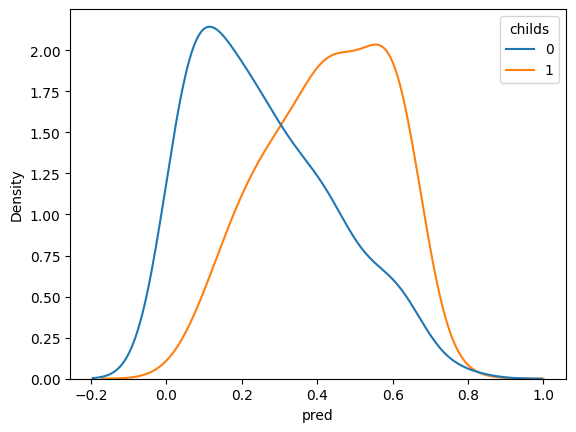

In [112]:
# 原始实验组 vs 对照组的倾向评分分布
preds = model.predict_proba(train_x)
df['pred'] = preds[:,1]
auc = roc_auc_score(df['childs'], df['pred'])
print(f"auc: {auc}")
sns.kdeplot(
    data=df, x='pred', hue='childs', 
    fill=False, common_norm=False, bw_adjust=2,
)

<Axes: xlabel='pred', ylabel='Density'>

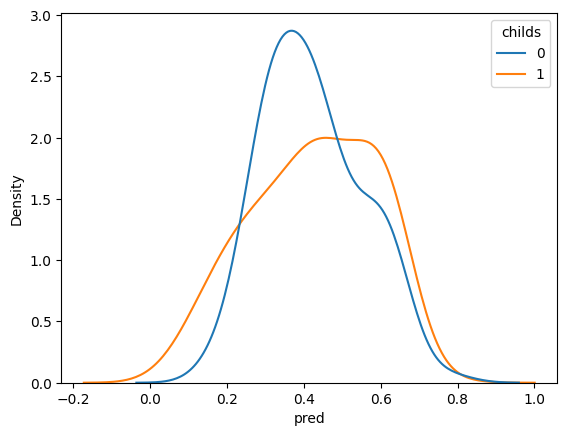

In [113]:
# 半径匹配
r = 0.1
df = df.sort_values(by='pred', ascending=False)
df['index'] = df.index
exp = df[df['childs']==1][['index', 'pred']].to_numpy()
base = df[df['childs']==0][['index', 'pred']].to_numpy()
ind = []
i = j = 0
while i < len(exp) and j < len(base):
    if abs(exp[i][1] - base[j][1]) <= r:
        ind.append(int(exp[i][0]))
        ind.append(int(base[j][0]))
        i += 1
        j += 1
    elif exp[i][1] - base[j][1] > r:
        i += 1
    else:
        j += 1
df_new = df[df.index.isin(ind)]

# 倾向评分匹配后的倾向评分分布
sns.kdeplot(
    data=df_new, x='pred', hue='childs', 
    fill=False, common_norm=False, bw_adjust=2,
)

<Axes: xlabel='age', ylabel='Density'>

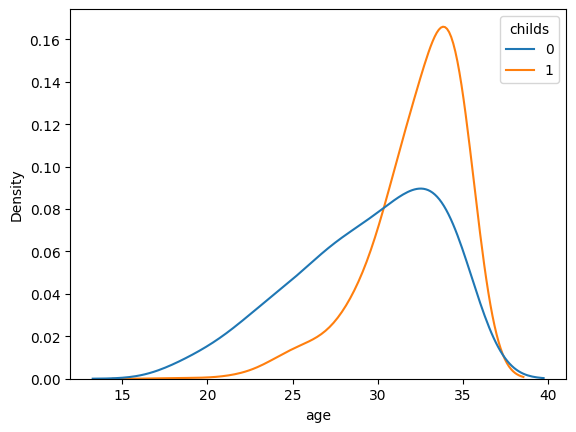

In [114]:
sns.kdeplot(
    data=df, x='age', hue='childs', 
    fill=False, common_norm=False, bw_adjust=2,
)

<Axes: xlabel='edu', ylabel='Count'>

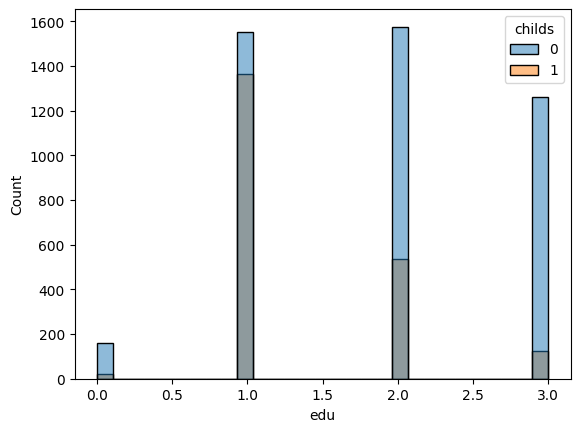

In [115]:
sns.histplot(
    data=df, x='edu', hue='childs', 
)

<Axes: xlabel='edu', ylabel='Count'>

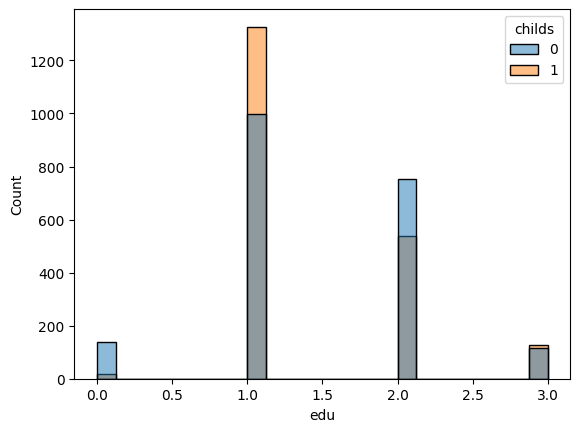

In [116]:
sns.histplot(
    data=df_new, x='edu', hue='childs', 
)

<Axes: xlabel='edu', ylabel='Density'>

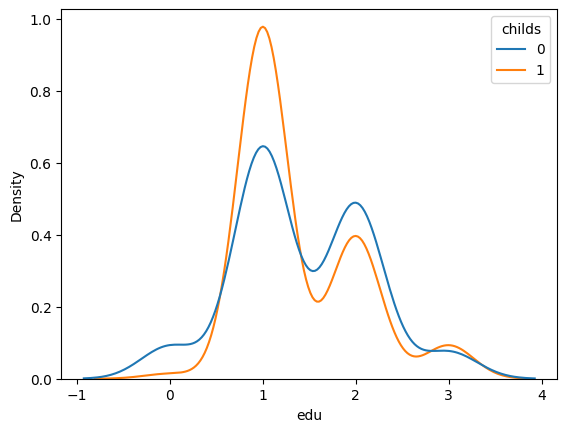

In [117]:
sns.kdeplot(
    data=df_new, x='edu', hue='childs', 
    fill=False, common_norm=False, bw_adjust=2,
)

In [118]:
# 协变量平衡性检验

# 匹配前
age_avg_1_before = np.average(df[df['childs']==1]['age'])
age_var_1_before = np.var(df[df['childs']==1]['age'])

age_avg_0_before = np.average(df[df['childs']==0]['age'])
age_var_0_before = np.var(df[df['childs']==0]['age'])
print(age_avg_1_before, age_var_1_before)
print(age_avg_0_before, age_var_0_before)
print(stats.levene(df[df['childs']==1]['age'], df[df['childs']==0]['age']))
print(stats.ttest_ind(df[df['childs']==1]['age'], df[df['childs']==0]['age'], equal_var=False))
print("")

age_avg_1_after = np.average(df_new[df_new['childs']==1]['age'])
age_var_1_after = np.var(df_new[df_new['childs']==1]['age'])
age_avg_0_after = np.average(df_new[df_new['childs']==0]['age'])
age_var_0_after = np.var(df_new[df_new['childs']==0]['age'])

print(age_avg_1_after, age_var_1_after)
print(age_avg_0_after, age_var_0_after)
print(stats.levene(df_new[df_new['childs']==1]['age'], df_new[df_new['childs']==0]['age']))
print(stats.ttest_ind(df_new[df_new['childs']==1]['age'], df_new[df_new['childs']==0]['age'], equal_var=False))


32.245476772616136 7.300132352149975
29.371919014084508 17.92989807794832
LeveneResult(statistic=np.float64(564.6345706160331), pvalue=np.float64(8.073232911860585e-120))
TtestResult(statistic=np.float64(33.14079575667653), pvalue=np.float64(7.33494998549913e-221), df=np.float64(5845.727458918475))

32.214036834245896 7.37479550088316
32.48232951717272 5.11678581277234
LeveneResult(statistic=np.float64(27.474662217191785), pvalue=np.float64(1.6734993026814348e-07))
TtestResult(statistic=np.float64(-3.4015900540212396), pvalue=np.float64(0.0006767093916458746), df=np.float64(3888.9289065331714))


In [119]:
edu_avg_1_before = np.average(df[df['childs']==1]['edu'])
edu_avg_0_before = np.average(df[df['childs']==0]['edu'])
print(edu_avg_1_before, edu_avg_0_before)
print(stats.ttest_ind(df[df['childs']==1]['edu'], df[df['childs']==0]['edu'], equal_var=False))

edu_avg_1_after = np.average(df_new[df_new['childs']==1]['edu'])
edu_avg_0_after = np.average(df_new[df_new['childs']==0]['edu'])
print(edu_avg_1_after, edu_avg_0_after)
print(stats.ttest_ind(df_new[df_new['childs']==1]['edu'], df_new[df_new['childs']==0]['edu'], equal_var=False))

1.3765281173594133 1.8668573943661972
TtestResult(statistic=np.float64(-26.318025820607406), pvalue=np.float64(1.1082391171309358e-143), df=np.float64(5368.13049917699))
1.3832752613240418 1.4211050273768044
TtestResult(statistic=np.float64(-1.8077297859493517), pvalue=np.float64(0.07072469880017444), df=np.float64(3945.0786028451294))


In [120]:
income_1_data = df_new[np.negative(df_new['income'].isin(['拒绝回答', '不适用','不知道']))][df_new['childs']==1]['income'].astype(int)
income_0_data = df_new[np.negative(df_new['income'].isin(['拒绝回答', '不适用','不知道','9999990']))][df_new['childs']==0]['income'].astype(int)
income_avg_1 = np.average(income_1_data)
income_var_1 = np.var(income_1_data)
income_avg_0 = np.average(income_0_data)
income_var_0 = np.var(income_0_data)
print(stats.levene(income_0_data, income_1_data))
t, p = stats.ttest_ind(income_1_data, income_0_data, equal_var=True)
print(
    f"""
        对照组均值: {income_avg_0}
        实验组均值: {income_avg_1}
        ATT: {income_avg_1 - income_avg_0}
        t值: {t}  p值: {p}
    """)

LeveneResult(statistic=np.float64(3.5848669608913246), pvalue=np.float64(0.05837990322000375))

        对照组均值: 24615.67944250871
        实验组均值: 21001.081134892982
        ATT: -3614.598307615728
        t值: -2.3523588019004165  p值: 0.018702779349317317
    


radius: 0.2
LeveneResult(statistic=np.float64(4.88340647962859), pvalue=np.float64(0.02717126916200001))

            对照组均值: 24920.07334963325
            实验组均值: 20730.597555012224
            ATT: -4189.475794621027
            t值: -2.680978109608863  p值: 0.007372047761010835
        
radius: 0.1
LeveneResult(statistic=np.float64(6.25030563750799), pvalue=np.float64(0.01245676287806342))

            对照组均值: 25828.073668491787
            实验组均值: 20901.77799900448
            ATT: -4926.295669487306
            t值: -3.013015063347624  p值: 0.0026041810538596573
        
LeveneResult(statistic=np.float64(13.324497042319436), pvalue=np.float64(0.0002803900849952))

            对照组均值: 50507.636118598384
            实验组均值: 30274.571428571428
            ATT: -20233.064690026957
            t值: -4.291067451023467  p值: 2.0801371789741524e-05
        
LeveneResult(statistic=np.float64(11.183138126476226), pvalue=np.float64(0.0008687976729006586))

            对照组均值: 49925.09269662921
          

/Users/wangzixin/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/wangzixin/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/wangzixin/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/wangzixin/Library/Python/3.9/lib/python/site-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/wangzixin/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/wangzixin/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeW

<Axes: xlabel='year', ylabel='att1'>

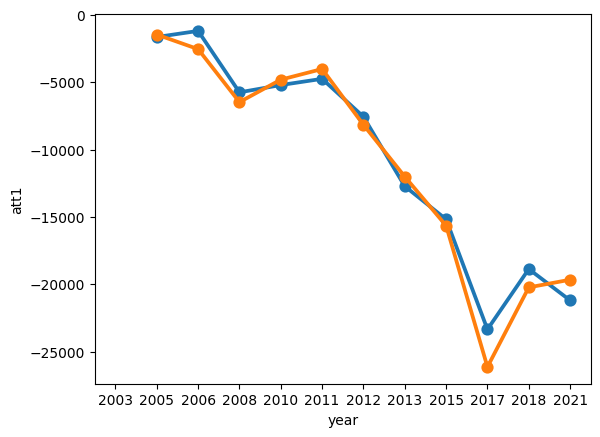

In [ ]:

def raidus_matching(df, ps_col='pred', r=0.05):
    df = df.sort_values(by=ps_col, ascending=False)
    df['index'] = df.index
    exp = df[df['childs']==1][['index', ps_col]].to_numpy()
    base = df[df['childs']==0][['index', ps_col]].to_numpy()

    ind = []
    i = j = 0
    while i < len(exp) and j < len(base):
        if abs(exp[i][1] - base[j][1]) <= r:
            ind.append(int(exp[i][0]))
            ind.append(int(base[j][0]))
            i += 1
            j += 1
        elif exp[i][1] - base[j][1] > r:
            i += 1
        else:
            j += 1

    df_new = df[df.index.isin(ind)]
    return df_new

def calc_att(df_new):
    income_1_data = df_new[np.negative(df_new['income'].isin(['拒绝回答', '不适用','不知道']))][df_new['childs']==1]['income'].astype(int)
    income_0_data = df_new[np.negative(df_new['income'].isin(['拒绝回答', '不适用','不知道','9999990']))][df_new['childs']==0]['income'].astype(int)
    income_avg_1 = np.average(income_1_data)
    income_var_1 = np.var(income_1_data)
    income_avg_0 = np.average(income_0_data)
    income_var_0 = np.var(income_0_data)
    print(stats.levene(income_0_data, income_1_data))
    t, p = stats.ttest_ind(income_1_data, income_0_data, equal_var=False)
    print(
        f"""
            对照组均值: {income_avg_0}
            实验组均值: {income_avg_1}
            ATT: {income_avg_1 - income_avg_0}
            t值: {t}  p值: {p}
        """)
    return income_avg_1 - income_avg_0

print("radius: 0.2")
calc_att(raidus_matching(df, r=0.2))

print("radius: 0.1")
calc_att(raidus_matching(df, r=0.1))

res = {
    "year":  [2018, 2021, 2015, 2010, 2017, 2005, 2011, 2008, 2006, 2012, 2013, 2003],
    "att1": [],
    "att2": []
}
for year in res['year']:
    att2 = calc_att(raidus_matching(df[df['年份']==year], r=0.2))
    att1 = calc_att(raidus_matching(df[df['年份']==year], r=0.1))
    res['att1'].append(att1)
    res['att2'].append(att2)

tmp = pd.DataFrame(res)
tmp.sort_values("year")

sns.pointplot(tmp, x='year', y='att1')
sns.pointplot(tmp, x='year', y='att2')
# tmp.plot.scatter('year', 'att1', color='red')
# tmp.plot.scatter('year', 'att2', color='blue')
